# 02 - Data Cleaning


## Importing the dataset and modules

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')
sns.set_palette('viridis')

%matplotlib inline

data = '../data/train.csv'
test_data = '../data/test.csv'

housing = pd.read_csv(data)
test = pd.read_csv(test_data)

In [ ]:
####

### Changing column names to lowercase and removing spaces

In [2]:
def column_rename(dataframe):
    dataframe.columns = [x.lower().replace(' ','_') for x in dataframe.columns] 

In [3]:
column_rename(housing)

column_rename(test)

### Checking for missing values

In [4]:
housing.columns[housing.isnull().any()]

Index(['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',
       'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature'],
      dtype='object')

In [5]:
test.columns[test.isnull().any()]

Index(['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2',
       'electrical', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'garage_finish', 'garage_qual', 'garage_cond', 'pool_qc', 'fence',
       'misc_feature'],
      dtype='object')

#### Lot Frontage

There were 330 properties with null values for lot frontage in the training set and 160 with null values in the test set. Since it is unlikely that properties in Ames have no street access, I chose to examine this feature more carefully to determine if the null values were a data entry error.

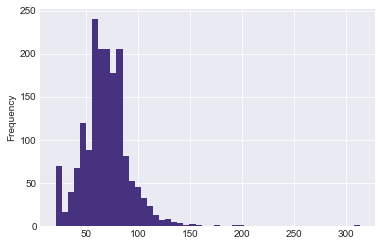

In [6]:
housing['lot_frontage'].plot(kind='hist', bins=50);

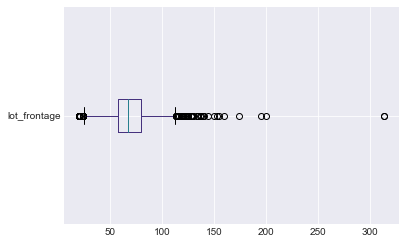

In [7]:
housing.boxplot('lot_frontage',vert=False);

Based on the distribution's significant positive skew, I chose to impute the null values with the median lot frontage.

In [8]:
housing['lot_frontage'].replace(np.nan, housing['lot_frontage'].median(), inplace=True)

In [9]:
test['lot_frontage'].replace(np.nan, test['lot_frontage'].median(), inplace=True)

#### Alley type

Properties with null values representing no alley access were converted to 'No access'.

In [10]:
housing['alley'].value_counts(dropna=False)

NaN     1911
Grvl      85
Pave      55
Name: alley, dtype: int64

In [11]:
test['alley'].value_counts(dropna=False)

NaN     821
Grvl     35
Pave     23
Name: alley, dtype: int64

We see that only 140 homes have alleys in the train data (6%). Let's drop this column.

In [12]:
housing.drop('alley', axis=1, inplace=True)

In [13]:
test.drop('alley', axis=1, inplace=True)

#### Masonry veneer type and area

The 22 masonry veneer type null values were converted to 'None'. Area for properties with no masonry veneer was imputed as 0 correspondingly.

In [14]:
housing['mas_vnr_type'].replace(np.nan, 'None', inplace=True)

housing['mas_vnr_area'].replace(np.nan, 0, inplace=True)

In [15]:
housing['mas_vnr_type'].value_counts()

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [16]:
test['mas_vnr_type'].value_counts()

None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64

In [17]:
test['mas_vnr_type'].replace(np.nan, 'None', inplace=True)

test['mas_vnr_area'].replace(np.nan, 0, inplace=True)

#### Basement Variables

For the 10 variables quantifying basements, null values signified that the property has no basement. For categorical variables, I changed the value to 'No Basement' instead of null. For continuous variables regarding area (BsmtFin SF1, BsmtFin SF2, Bsmt UnfSF, TotalBsmtSF) and number of rooms (Bsmt Full Bath, Bsmt Half Bath) I converted null values to 0.

In [18]:
basement_cats = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']

housing[basement_cats] = housing[basement_cats].replace({np.nan: 'No basement'})

basement_num = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']

housing[basement_num] = housing[basement_num].replace({np.nan: 0})

In [19]:
test[basement_cats] = test[basement_cats].replace({np.nan: 'No basement'})

test[basement_num] = test[basement_num].replace({np.nan: 0})

#### Garage Variables

Similar to the basement variables, null values for the garage-related variables signify the lack of a garage on the property. I did a similar process to impute *'None'* values for nulls (i.e. 'No garage' for categorical variables and 0 for continuous variables where applicable). I dropped `garage_yr_blt` since it is meaningless if no garage exists.

In [20]:
garage = ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']

housing[garage] = housing[garage].replace({np.nan: 'No garage'})

garage_num = ['garage_area', 'garage_cars']

housing[garage_num] = housing[garage_num].replace({np.nan: 0})

housing.drop('garage_yr_blt', axis=1, inplace=True)

In [21]:
test[garage] = test[garage].replace({np.nan: 'No garage'})

test[garage_num] = test[garage_num].replace({np.nan: 0})

test.drop('garage_yr_blt', axis=1, inplace=True)

#### Fireplace Quality, Pool Quality, Fence, Misc Feature

For the remaining categorical variables with missing data, NA signified the lack of the item specified in the category. I inputed the null values as a value of "None".

In [22]:
categories = ['fireplace_qu', 'pool_qc', 'fence', 'misc_feature']

housing[categories] = housing[categories].replace({np.nan: 'None'})

test[categories] = test[categories].replace({np.nan: 'None'})

#### Checking for data shape

In [23]:
test.shape, housing.shape

((879, 78), (2051, 79))

We see that the test data has 1 less column (the target variable `saleprice`) compared to the training data.

## Exporting the clean dataset

In [24]:
housing.to_csv('../data/housing_clean.csv', index=False)

In [25]:
test.to_csv('../data/test_clean.csv', index=False)